In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button

In [3]:
# [OBC, UHF, S-Band, EPS, CAM1, CAM2, CAM3, ADCS, FSS]
components_peak = [3.5, 3., 5., 0.75, 3.7, 3.7, 0.76, 3.75, 0.5] #watts

In [4]:
# Orbit times (sekunder)
orbit_time = 96.52*60
sunlit_time = 62.35*60
eclipse_time = orbit_time-sunlit_time

#Efficiencies
reg_eff = 0.9 #percent
V5_eff = 0.85 #percent

#Initial values
init_UHF = 0.5
init_OBC = 0.5

# Gain and usage
gain_season = [8.51, 8.51, 8.40, 8.29]
gain_avg = sum(gain_season)/4 #Gained wattage pr. orbit

<IPython.core.display.Javascript object>


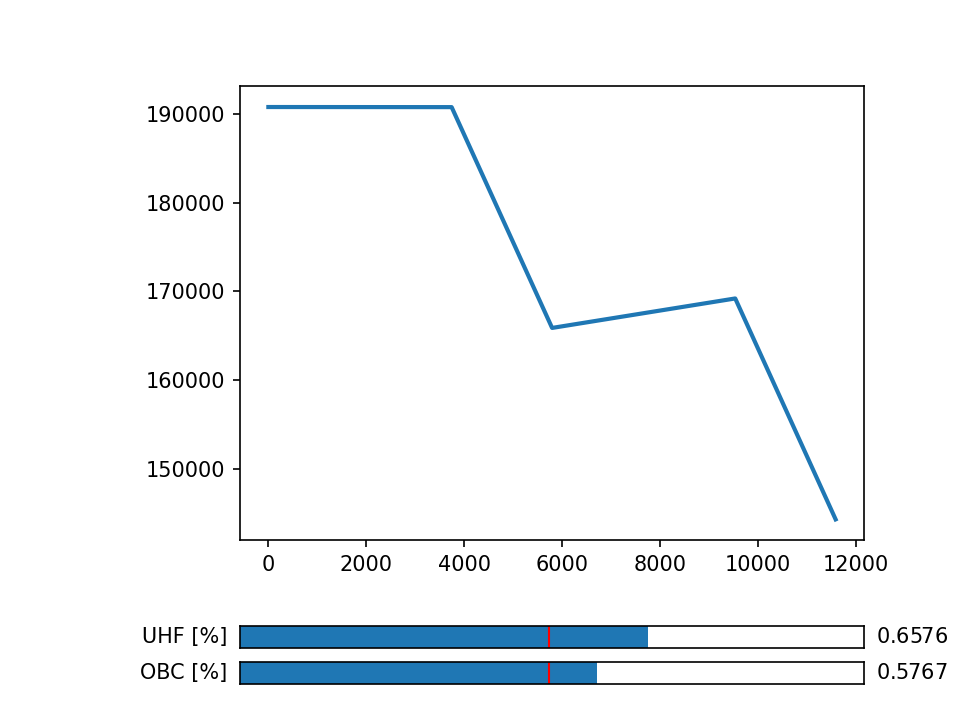

In [5]:

total_battery = 190800 #Joule

def funk(OBC, UHF):
    time = 0
    battery_level = [total_battery]
    time_list = [time]
    temp_bat = total_battery

    duty_factors = [OBC, UHF, 0.10, 1, 0.5, 0.05, 0.5, 0.5, 1]
    components_cycle = [x1*x2 for x1,x2 in zip(components_peak,duty_factors)]
    for i in range(len(components_cycle)):
        components_cycle[i] = round(components_cycle[i],2)
    # ---
    usage_avg_ss = sum(components_cycle)/(reg_eff*V5_eff) #Hentet fra spread sheet
    
    while battery_level[-1] > 0:
        for i in range(round(sunlit_time)):
            time += 1
            time_list.append(time)
            if temp_bat < total_battery:
                temp_bat = battery_level[-1] + gain_avg/(sunlit_time/orbit_time) - usage_avg_ss
            battery_level.append(temp_bat)

        for j in range(round(eclipse_time)):
            time += 1
            time_list.append(time)
            temp_bat = battery_level[-1] - usage_avg_ss
            battery_level.append(temp_bat)

        if time_list[-1] > 10000:
            break
    return time_list, battery_level


fig, ax = plt.subplots()
time_list1, battery_level1 = funk(init_OBC, init_UHF)
line, = plt.plot(time_list1, battery_level1, lw=2)

# adjust the main plot to make room for the sliders
plt.subplots_adjust(left=0.25, bottom=0.25)

# Make a horizontal slider to control the OBC factor.
OBC = plt.axes([0.25, 0.05, 0.65, 0.03])
OBC_slider = Slider(
    ax=OBC,
    label='OBC [%]',
    valmin=0.01,
    valmax=1,
    valinit=init_OBC,
)

# Make a horizontal slider to control the OBC factor.
UHF = plt.axes([0.25, 0.1, 0.65, 0.03])
UHF_slider = Slider(
    ax=UHF,
    label='UHF [%]',
    valmin=0.01,
    valmax=1,
    valinit=init_UHF,
)

# The function to be called anytime a slider's value changes
def update(val):
    time_list2, battery_level2 = funk(OBC_slider.val, UHF_slider.val)
    line.set_ydata(time_list2, battery_level2, lw=2)
    plt.gcf().canvas.draw_idle()

OBC_slider.on_changed(update)
UHF_slider.on_changed(update)

plt.show()